<a href="https://colab.research.google.com/github/rishik0910/AIML-2025/blob/main/2303A15778_10_12_ipylb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction of Car evaluation for buying decision
1. Identify the top 5 reasons for buying a car
2. Identify the class with most cars sold
3. Find the max and min safety choice for car buying
4. What is the role of paint, doors, lug_boot in car buying
5. Identify the cars with most maintenance
6. Apply either Classification Model or Clustering Model to evaluate the dataset

In [3]:
# Install necessary libraries
!pip install scikit-learn matplotlib pandas


In [4]:
# Importing the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [5]:
# File paths for Google Colab (upload the files first)
# The user should upload 'car.data', 'car.names', and 'car.c45-names' using the file upload widget.
from google.colab import files
uploaded = files.upload()


Saving car.c45-names to car (1).c45-names
Saving car.data to car (1).data
Saving car.names to car (1).names


In [6]:
# Load the dataset
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_data = pd.read_csv('car.data', header=None, names=columns)  # Assuming the 'car.data' file is uploaded


In [7]:
# 1. Top 5 reasons for buying a car
top_reasons = car_data.drop('class', axis=1).mode().iloc[0]
print("Top 5 reasons for buying a car:")
print(top_reasons)


Top 5 reasons for buying a car:
buying      high
maint       high
doors          2
persons        2
lug_boot     big
safety      high
Name: 0, dtype: object


In [8]:
# 2. Identify the class with the most cars sold
most_sold_class = car_data['class'].value_counts().idxmax()
print(f"\nClass with the most cars sold: {most_sold_class}")



Class with the most cars sold: unacc


In [9]:
# 3. Max and Min safety choices
safety_counts = car_data['safety'].value_counts()
max_safety = safety_counts.idxmax()
min_safety = safety_counts.idxmin()
print(f"\nMost common safety choice: {max_safety}")
print(f"Least common safety choice: {min_safety}")



Most common safety choice: low
Least common safety choice: low


In [10]:
# 4. Role of paint (buying), doors, lug_boot
paint_effect = car_data['buying'].value_counts()
doors_effect = car_data['doors'].value_counts()
lug_boot_effect = car_data['lug_boot'].value_counts()
print(f"\nEffect of buying (paint):\n{paint_effect}")
print(f"Effect of doors:\n{doors_effect}")
print(f"Effect of luggage boot:\n{lug_boot_effect}")



Effect of buying (paint):
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
Effect of doors:
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
Effect of luggage boot:
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64


In [11]:
# 5. Cars with the highest maintenance costs
high_maint = car_data[car_data['maint'] == 'vhigh']
print(f"\nCars with highest maintenance cost:\n{high_maint}")



Cars with highest maintenance cost:
     buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1399    low  vhigh  5more    more      med    med    acc
1400    low  vhigh  5more    more      med   high    acc
1401    low  vhigh  5more    more      big    low  unacc
1402    low  vhigh  5more    more      big    med    acc
1403    low  vhigh  5more    more      big   high    acc

[432 rows x 7 columns]


In [12]:
# 6. Classification Model: Decision Tree
X = car_data.iloc[:, :-1]  # Features
y = car_data['class']      # Target

# Convert categorical data to numeric
X_encoded = pd.get_dummies(X, drop_first=True)
y_encoded = y.astype('category').cat.codes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")



Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       118
           1       0.54      0.68      0.60        19
           2       0.94      0.97      0.96       358
           3       0.73      0.79      0.76        24

    accuracy                           0.89       519
   macro avg       0.77      0.79      0.77       519
weighted avg       0.90      0.89      0.89       519

Accuracy: 0.89


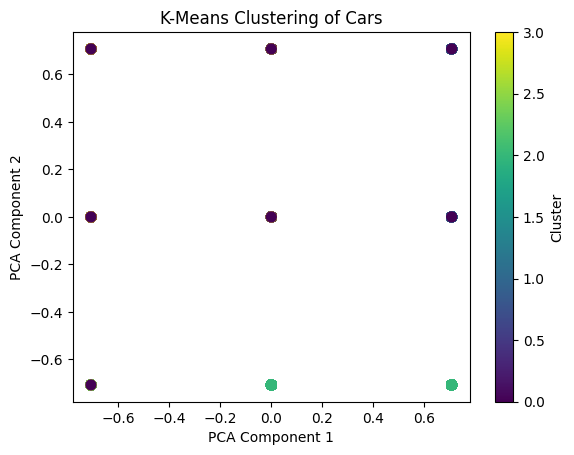

In [13]:
# Clustering Model: K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
car_data_clustered = car_data.copy()
car_data_clustered['cluster'] = kmeans.fit_predict(X_encoded)

# Plot clusters (using first two PCA components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=car_data_clustered['cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering of Cars')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
